# Laboratorio: Aprendizaje Supervisado

## ¿A dónde realizan su primera reserva los nuevos usuarios de Airbnb?

Durante este práctico vamos a trabajar con todos los datos provistos por [Airbnb New User Bookings](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data) en Kaggle.

## Objetivo y alcance:

En este laboratorio vamos a aplicar todo lo aprendido en las materias previas y lo vamos a complementar con lo aprendido en la materia de __Aprendizaje Supervisado__. La idea principal es poder armar una notebook completa, partiendo desde el preprocesamiento y curación de los datos, hasta la elección final de un modelo y su posterior testeo.

Tal vez este laboratorio sea un poco más extenso que los anteriores, pero eso se debe a que estamos uniendo las diferentes *piezas* de un proyecto de aprendizaje supervisado.

## Estructura del informe:

  * Jupyter Notebook con el análisis realizado.
  
---

## Introducción:

En el presente laboratorio, vamos a tomar como referencia el siguiente [Notebook Ejemplo](https://www.kaggle.com/malgoro39/predicci-n-de-destinos-airbnb). En dicho notebook, el autor realiza un análisis exhaustivo y además explica de una manera muy didáctica las decisiónes tomadas y los conceptos teóricos involucrados. 

Tratemos de imitar y mejorar el trabajo realizado :)

En este caso, vamos a trabajar con todos los datos originales de __Airbnb__:
* __ager_gender_bkts.csv__
* __countries.csv__
* __sessions.csv__
* __test_users.csv__ / __test_users_2.csv__

Por una cuestión de tamaño de los datasets, éstos se encuentran comprimidos en el archivo __/Datos/original_data.zip__. Además la notebook de ejemplo se encuentra en __/Notebooks/Ejemplos/Ejemplo_Laboratorio_Supervisado.ipynb__.

## Tareas:

1. __Análisis y Visualización de datos__: Realizar un breve análisis de los datasets antes mencionados.
2. __Curación de datos__: Realizar la correspondiente curación de los mismos.
3. __Feature Engineering__: Tomando como ejemplo la notebook antes mencionada aplicar un poco de ingeniería de features, por ejemplo: generar nuevos features, mergear datasets, etc.
4. __Selección de un modelo de Aprendizaje Supervisado__: Aplicar distintos modelos de aprendizaje supervisado al dataset generado en el punto anterior.
5. __Ajuste de hiperparámetros__: Realizar una búsqueda de hiperparámetros que permitan mejorar la clasificación de los modelos escogidos.
6. __Testing de precisión__: Medir la precisión de cada uno de tus modelos (con datos no conocidos).
7. __¿Qué modelo generó los mejores resultados?__

## 1. Análisis y Visualización de datos

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
dataset_path = "..//datos//"

### Countries

In [3]:
countries_df = pd.read_csv(dataset_path+"countries.csv") 
countries_df.describe()

,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance
count,10.000000,10.000000,10.000000,1.000000e+01,10.00000
mean,39.799398,-4.262446,7181.897800,2.973734e+06,50.49900
std,24.739112,63.700585,3941.141734,4.329619e+06,44.54169
min,-26.853388,-96.818146,0.000000,4.154300e+04,0.00000
25%,39.639090,-6.737559,7001.557600,2.580425e+05,0.00000
50%,44.053092,-0.139014,7603.632650,4.311960e+05,67.91500
75%,51.891219,9.163386,7842.357000,5.966865e+06,91.39500
max,62.393303,133.275160,15297.744000,9.984670e+06,95.45000


In [4]:
countries_df

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


### Sessions

In [5]:
sessions_df = pd.read_csv(dataset_path+"sessions.csv") 
sessions_df.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [6]:
sessions_df.sample(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
744532,xa2lhx78zy,similar_listings,data,similar_listings,Mac Desktop,112.0
3226185,jg695e8h89,personalize,data,wishlist_content_update,Mac Desktop,560.0
10123341,otp2vllabl,index,view,user_wishlists,Mac Desktop,471.0
687331,ky6h4ginzq,ajax_refresh_subtotal,click,change_trip_characteristics,Mac Desktop,735.0
2249470,2qxecu5wyg,search_results,click,view_search_results,Mac Desktop,11969.0
2929027,ibng645ytx,show,view,p3,Mac Desktop,420.0
1893994,2k5rbv8d3a,show,view,user_profile,iPhone,42.0
7098395,xm31mtqaba,similar_listings_v2,NaN,NaN,Windows Desktop,129.0
7628968,2j1chrxex2,ajax_refresh_subtotal,click,change_trip_characteristics,Mac Desktop,34.0
3929903,p6qnnt3fpb,social_connections,data,user_social_connections,iPhone,2705.0


In [7]:
len(sessions_df)

10567737

#### Verificamos si hay valores nulos en el dataset

In [8]:
sessions_df.isnull().sum()

user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

In [9]:
sessions_df[ sessions_df.user_id.isnull() == False ].head(15)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [10]:
len(sessions_df.action.unique())

360

Veamos el campo __action__ y su relacion con __action_type__ y __action_detail__

In [11]:
sessions_df.action.unique()

array(['lookup', 'search_results', 'personalize', 'index',
       'similar_listings', 'ajax_refresh_subtotal', 'show',
       'header_userpic', 'ask_question', nan,
       'other_hosting_reviews_first', 'hosting_social_proof',
       'decision_tree', 'recent_reservations', 'faq_experiment_ids',
       'multi', 'active', 'dashboard', 'create', 'confirm_email',
       'show_personalize', 'verify', 'pending', 'requested', 'concierge',
       'faq', 'clear_reservation', 'cancellation_policies',
       'track_page_view', 'update', 'my', 'campaigns', 'notifications',
       'listings', 'unavailabilities', 'ajax_lwlb_contact',
       'ajax_check_dates', 'qt2', 'request_new_confirm_email',
       'ajax_photo_widget_form_iframe', 'facebook_auto_login', 'identity',
       'qt_reply_v2', 'travel_plans_current', 'complete_status',
       'populate_from_facebook', 'kba_update', 'kba', 'login',
       'authenticate', 'calendar_tab_inner2', 'other_hosting_reviews',
       'social_connections', 'relat

In [12]:
len(sessions_df.action_type.unique())

11

In [13]:
sessions_df.action_type.unique()

array([nan, 'click', 'data', 'view', 'submit', 'message_post',
       '-unknown-', 'booking_request', 'partner_callback',
       'booking_response', 'modify'], dtype=object)

In [14]:
len(sessions_df.action_detail.unique())

156

In [15]:
sessions_df.action_detail.unique()

array([nan, 'view_search_results', 'wishlist_content_update',
       'similar_listings', 'change_trip_characteristics', 'p3',
       'header_userpic', 'contact_host', 'message_post', '-unknown-',
       'dashboard', 'create_user', 'confirm_email_link',
       'user_profile_content_update', 'user_profile', 'pending', 'p5',
       'create_phone_numbers', 'cancellation_policies', 'user_wishlists',
       'change_contact_host_dates', 'wishlist', 'message_thread',
       'request_new_confirm_email', 'send_message', 'your_trips',
       'login_page', 'login', 'login_modal', 'toggle_archived_thread',
       'p1', 'profile_verifications', 'edit_profile', 'oauth_login',
       'post_checkout_action', 'account_notification_settings',
       'update_user_profile', 'oauth_response', 'signup_modal',
       'signup_login_page', 'at_checkpoint', 'manage_listing',
       'create_listing', 'your_listings', 'profile_references',
       'list_your_space', 'popular_wishlists', 'listing_reviews_page',
    

Verificamos que, si __action_type__ es null, tambien lo es __action_detail__

In [16]:
sessions_df[ sessions_df.action_type.isnull() == True ].action_detail.unique()

array([nan], dtype=object)

Veamos que valores hay para __action__ cuando __action_type__ es nulo

In [17]:
sessions_df[ sessions_df.action_type.isnull()].action.unique()

array(['lookup', 'show', 'track_page_view', 'widget', 'uptodate', 'index',
       'campaigns', 'currencies', 'localization_settings', 'update',
       'phone_verification', 'satisfy', 'track_activity', 'check',
       'signed_out_modal', 'disaster_action', 'similar_listings_v2',
       'braintree_client_token'], dtype=object)

In [18]:
sessions_df[ sessions_df.action.isnull()].action_type.unique()

array(['message_post'], dtype=object)

Vamos a reemplazar el null en estos campos, por un valor fijo

In [19]:
sessions_df['action'].fillna('unknown_action', inplace=True) 
sessions_df['action_type'].fillna('unknown_action_type-', inplace=True) 
sessions_df['action_detail'].fillna('unknown_action_detail-', inplace=True) 

In [20]:
sessions_df.isnull().sum()

user_id           34496
action                0
action_type           0
action_detail         0
device_type           0
secs_elapsed     136031
dtype: int64

Analicemos el __user_id__, porque puede dejar elementos fuera del merge con usuarios

In [21]:
len(sessions_df[sessions_df.user_id.isnull() == True]) / len(sessions_df)

0.003264275028797556

La proporcion de user_id en null, es baja (3%). Vamos a eliminarlos

In [22]:
sessions_df.dropna(subset=['user_id'], inplace=True)

In [23]:
sessions_df.isnull().sum()

user_id               0
action                0
action_type           0
action_detail         0
device_type           0
secs_elapsed     135483
dtype: int64

Tratamiento de los nulos de secs_elapsed

In [24]:
secs_elapsed_median = sessions_df.secs_elapsed.median()
print(secs_elapsed_median)
sessions_df['secs_elapsed'].fillna(secs_elapsed_median, inplace=True) 

1146.0


In [25]:
sessions_df.isnull().sum()

user_id          0
action           0
action_type      0
action_detail    0
device_type      0
secs_elapsed     0
dtype: int64

Listo, no quedan null values en sessions

In [26]:
sessions_df['device_type'].value_counts()

Mac Desktop                         3585886
Windows Desktop                     2648521
iPhone                              2096749
Android Phone                        835991
iPad Tablet                          681836
Android App Unknown Phone/Tablet     272820
-unknown-                            210059
Tablet                               139859
Linux Desktop                         27968
Chromebook                            22272
iPodtouch                              8186
Windows Phone                          2047
Blackberry                              979
Opera Phone                              68
Name: device_type, dtype: int64

### Age_Gender_Bkts

In [27]:
age_gender_df = pd.read_csv(dataset_path+"age_gender_bkts.csv") 

In [28]:
age_gender_df.head(10)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


In [29]:
len(age_gender_df)

420

In [30]:
age_gender_df.describe()

,population_in_thousands,year
count,420.000000,420.0
mean,1743.133333,2015.0
std,2509.843202,0.0
min,0.000000,2015.0
25%,396.500000,2015.0
50%,1090.500000,2015.0
75%,1968.000000,2015.0
max,11601.000000,2015.0


Verificamos si hay valores nulos en el dataset

In [31]:
age_gender_df.isnull().sum()

age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64

## Test_users

In [47]:
train_users_df = pd.read_csv(dataset_path+"test_users.csv") 

In [33]:
len(train_users_df)

62096

In [34]:
train_users_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [35]:
train_users_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [48]:
train_users_df.date_account_created.unique()

array(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
       '2014-07-05', '2014-07-06', '2014-07-07', '2014-07-08',
       '2014-07-09', '2014-07-10', '2014-07-11', '2014-07-12',
       '2014-07-13', '2014-07-14', '2014-07-15', '2014-07-16',
       '2014-07-17', '2014-07-18', '2014-07-19', '2014-07-20',
       '2014-07-21', '2014-07-22', '2014-07-23', '2014-07-24',
       '2014-07-25', '2014-07-26', '2014-07-27', '2014-07-28',
       '2014-07-29', '2014-07-30', '2014-07-31', '2014-08-01',
       '2014-08-02', '2014-08-03', '2014-08-04', '2014-08-05',
       '2014-08-06', '2014-08-07', '2014-08-08', '2014-08-09',
       '2014-08-10', '2014-08-11', '2014-08-12', '2014-08-13',
       '2014-08-14', '2014-08-15', '2014-08-16', '2014-08-17',
       '2014-08-18', '2014-08-19', '2014-08-20', '2014-08-21',
       '2014-08-22', '2014-08-23', '2014-08-24', '2014-08-25',
       '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29',
       '2014-08-30', '2014-08-31', '2014-09-01', '2014-

### Tratamiento de __age__

Tratamos los datos faltantes en __age__ y eliminamos outliers

In [36]:
train_users_df.age.describe()

count    33220.000000
mean        37.616677
std         74.440647
min          1.000000
25%         26.000000
50%         31.000000
75%         40.000000
max       2002.000000
Name: age, dtype: float64

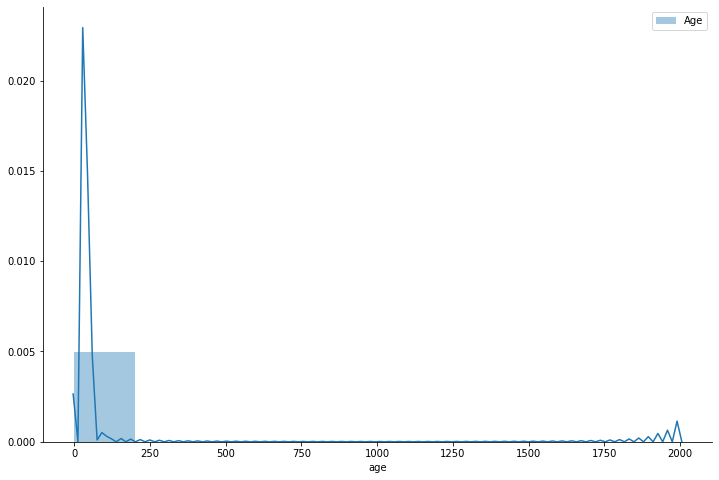

In [37]:
plt.figure(figsize=(12,8))
sns.distplot(train_users_df['age'].dropna(),bins=10, label='Age')
plt.legend(bbox_to_anchor=(1, 1))
sns.despine()

In [40]:
train_users_df = train_users_df[ train_users_df.age < 100 ]

In [41]:
train_users_df = train_users_df[ train_users_df.age > 13 ]

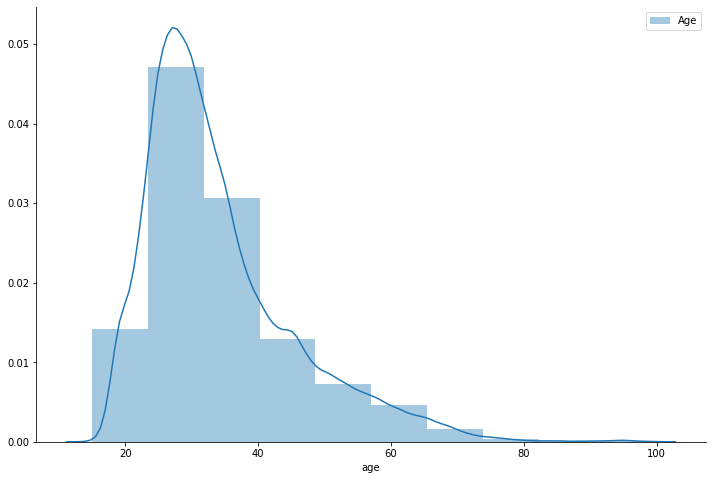

In [42]:
plt.figure(figsize=(12,8))
sns.distplot(train_users_df['age'].dropna(),bins=10, label='Age')
plt.legend(bbox_to_anchor=(1, 1))
sns.despine()

### Tratamiento de __first_affiliate_tracked__ y otros relacionados

In [43]:
train_users_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         32868
gender                         0
age                            0
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       12
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [44]:
train_users_df['first_affiliate_tracked'].unique()

array(['untracked', 'omg', 'linked', 'product', 'marketing',
       'tracked-other', nan, 'local ops'], dtype=object)

In [45]:
train_users_df.dropna(subset=['first_affiliate_tracked'], inplace=True)

### Tratamiento de __language__

In [52]:
train_users_df['language'].unique()

array(['en', 'de', 'zh', 'fr', 'ko', 'sv', 'no', 'it', 'es', 'nl', 'ja',
       'ru', 'pt', 'tr', 'cs', 'el', 'hu', 'pl', 'da', 'fi', 'th', 'ca',
       '-unknown-', 'id'], dtype=object)

In [53]:
train_users_df.groupby('language')['language'].count()

language
-unknown-        1
ca               1
cs              17
da              17
de             245
el               6
en           59224
es             259
fi               6
fr             336
hu               7
id               1
it             119
ja             120
ko             369
nl              37
no              21
pl              21
pt              82
ru             119
sv              54
th               4
tr              28
zh            1002
Name: language, dtype: int64

In [54]:
len( train_users_df[ train_users_df['language']=="en" ]) /  len(train_users_df)

0.9537490337541871

Se observa una gran mayoría de usuarios con lenguaje "Ingles" (95%)  
Veamos cual es la distribucion en el resto de los casos

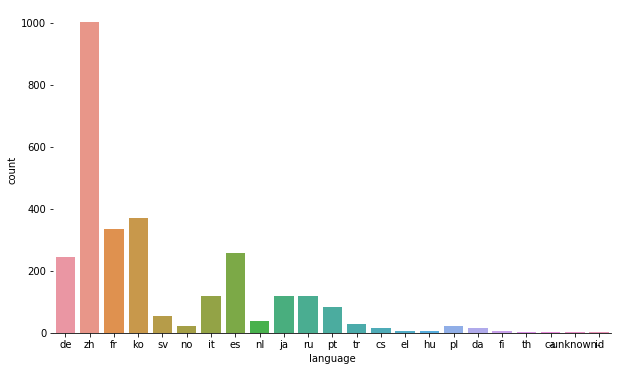

In [56]:
plt.figure(figsize=(10,6))

sns.countplot( data = train_users_df.query('language!="en"'), x='language')

sns.despine(left=True)

### Tratamiento de __gender__

In [58]:
train_users_df['gender'].unique()

array(['FEMALE', '-unknown-', 'MALE', 'OTHER'], dtype=object)

In [59]:
train_users_df.groupby('gender')['gender'].count()

gender
-unknown-    33792
FEMALE       14483
MALE         13769
OTHER           52
Name: gender, dtype: int64

Creo que la caracteristica de gender unknown es algo que deberiamos conservar, por lo que no vamos a hacer ningun tratamiento especial con ese valor. En el caso de "other", cuya frecuencia es muy baja, la reemplazamos por -unknown-

In [65]:
train_users_df.gender.replace('-unknown-','OTHER', inplace=True)

In [66]:
train_users_df.groupby('gender')['gender'].count()

gender
FEMALE    14483
MALE      13769
OTHER     33844
Name: gender, dtype: int64

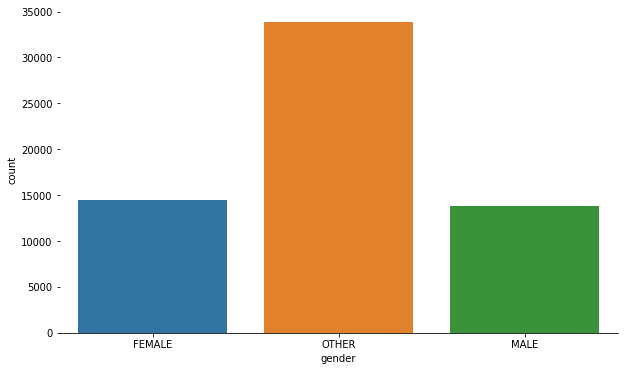

In [67]:
plt.figure(figsize=(10,6))

sns.countplot(  train_users_df['gender'] )

sns.despine(left=True)